# Linear Regression (30%)

The  dataset  includes  a  training  set  and  a  test  set,  each  set  consisting  of  (1)  a  matrix  of predictors (i.e., matrix X in the lecture slides), and (2) a vector with the dependent variable (e.g., 
vector Y in the lecture slides).  
### TASK: develop  the  ordinary  least  squares  solution  (i.e.,  pseudo-inverse)
The  problem  has 
been carefully calibrated, so the correct solution is expected to yield R2 values in a tight range. For full transparency, Appendix I includes a snippet of the Matlab code we used to generate the data, though we used different hyper parameters from those shown on the snippet.

### 15% credit: Compute the OLS solution on the training set and apply it to the test set.  
Compute the OLS solution on the training set and apply it to the test set.  Your results should include the R2 on test data, and a scatter plot of ground truth vs predictions.  
##### Please discuss your findings.

In [2]:
#imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import os


-	Training set:  Files x1.csv (one row per sample, one column per feature) and c1.csv (each row containing the class label of the corresponding row in x1.csv)
-	Validation set:  Files x2.csv and c2.csv, with similar structure as above.


In [3]:
#read in training and test data as pandas dataframes:
train_X = pd.read_csv('x1.csv', header=None)
train_y = pd.read_csv('y1.csv', header=None)
test_X = pd.read_csv('x2.csv', header=None)
test_y = pd.read_csv('y2.csv', header=None)

#print head of all dataframes to check if they are read in correctly
print(train_X.head())
print(train_y.head())
print(test_X.head())
print(test_y.head())


        0         1        2        3        4        5         6        7   \
0  1.38270  0.225920  0.13294 -1.07070 -1.08260 -1.09970  0.562490 -0.39981   
1 -1.66400 -0.079993  0.29757 -1.87740 -0.86082  0.81922  0.098554 -1.12060   
2  0.54314  0.636410  1.29420  2.02370 -0.45051  1.20380  1.437200 -1.31370   
3 -1.23650 -0.436510  1.47790 -1.61900  0.34281 -1.85290 -0.511870  0.82982   
4  0.35911  2.097900 -0.48545 -0.11176  1.24580 -0.12491 -0.630680 -0.59079   

         8         9   ...       16       17        18       19  20       21  \
0  0.222990  0.428880  ...  0.42526  1.84810 -1.321800  0.71849   1  1.07380   
1  0.362990  1.688700  ... -0.66313  0.72813 -0.177990 -1.27420   1 -0.91968   
2 -1.816700  1.306900  ...  1.54680 -1.13620 -0.099025 -0.52601   1  0.63598   
3 -0.920060 -0.221190  ... -1.47390  2.03080  0.856240 -0.49353   1  1.10430   
4  0.019867  0.007155  ... -0.28033 -1.41250  1.563400  1.83350   1  0.35216   

        22       23       24       25  
0  0

In [4]:
#compute OLS or Ordinary Least Squares which uses the formula:
#(X^T * X)^-1 * X^T * y to calculate the weights

#for the sake of simplicity, we will use scikit-learn's linear regression model
regression_model = linear_model.LinearRegression().fit(train_X, train_y)

print("Regression score for OLS: ", regression_model.score(test_X, test_y))
print("Regression Model Coefficients/Weights",regression_model.coef_)
# # print(regression_model.coef_.shape)
# boxplot = sns.boxplot(data=regression_model.coef_)
# boxplot.set_title("Boxplot of Regression Model Weights")
# boxplot.set_xlabel("Weights")
# boxplot.set_ylabel("Values")
# plt.show()

print("average weight: ", np.mean(regression_model.coef_))

Regression score for OLS:  0.9606822396194843
Regression Model Coefficients/Weights [[ 0.01406343 -0.00738955 -0.00339786 -0.08081296  0.01664003 -0.00393456
   0.03066151  0.22738778  0.0151364   0.04779523  0.03128287 -0.53692256
  -0.7335415  -0.00242663 -0.03690684 -0.03767773  0.01942357 -0.21207741
  -0.27932138  0.00520287  0.          0.04130665  0.02241085 -0.03904865
  -0.03296109  0.00116588]]
average weight:  -0.058997757065254904


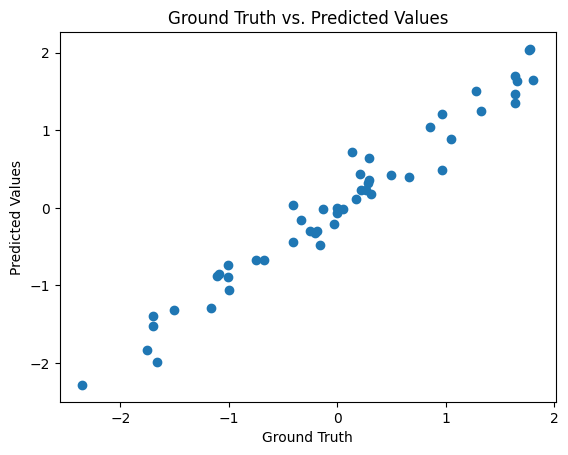

In [5]:
#make predictions
pred_y = regression_model.predict(test_X)
# print(pred_y)

#scatter plot of ground truth vs. predicted values
plt.scatter(test_y, pred_y)
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Values")
plt.title("Ground Truth vs. Predicted Values")
plt.show()


### 15% credit: Merge the training and test sets ([x1; x2], [y1; y2]) and re-split them to generate new training and test partitions.
Then repeat part a. multiple times and discuss the distribution of R2 values from split to split.
(i.e. k cross validation)

In [6]:
#merging together x1 and x2 to get the full dataset
#rereading in the data
train_X = pd.read_csv('x1.csv', header=None)
test_X = pd.read_csv('x2.csv', header=None)

train_y = pd.read_csv('y1.csv', header=None)
test_y = pd.read_csv('y2.csv', header=None)

#concatenating the dataframes vertically
data = pd.concat([train_X, test_X])
print("Training set after concatenation: ", data.shape)

y_concat = pd.concat([train_y, test_y])
print("Testing set after concatenation: ", y_concat.shape)

#concatenate y_concat to data


Training set after concatenation:  (100, 26)
Testing set after concatenation:  (100, 1)


Regression score for OLS:  0.9468870738927163


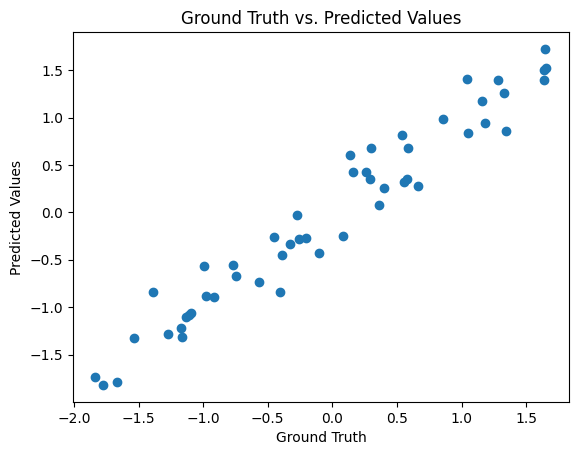

Regression score for OLS:  0.9309870337136599


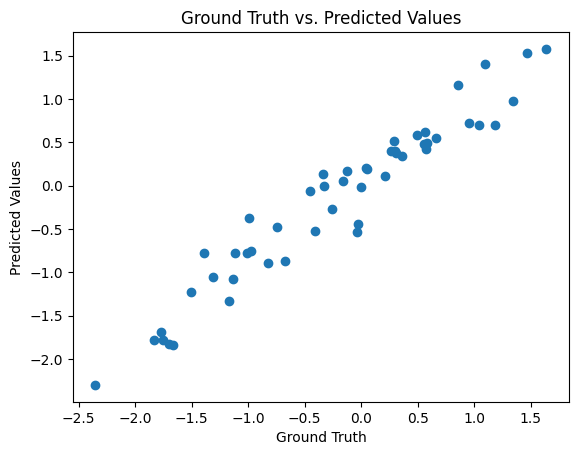

Regression score for OLS:  0.9383375837537319


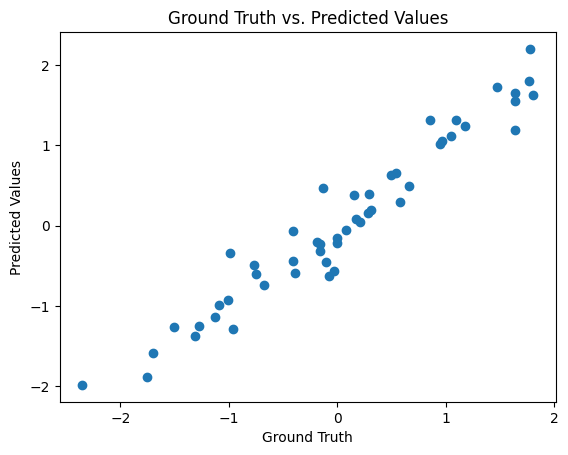

Regression score for OLS:  0.9597625363362323


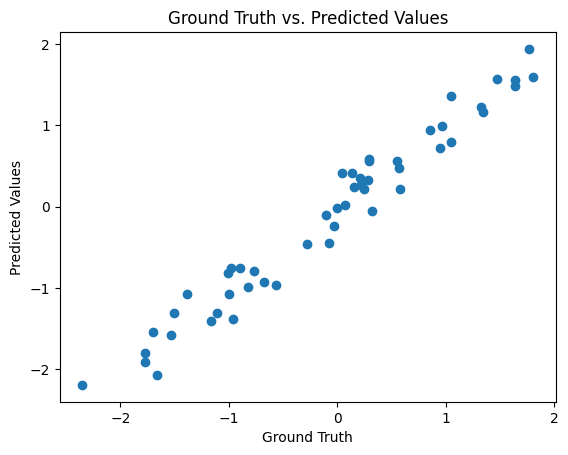

Regression score for OLS:  0.9210466432739465


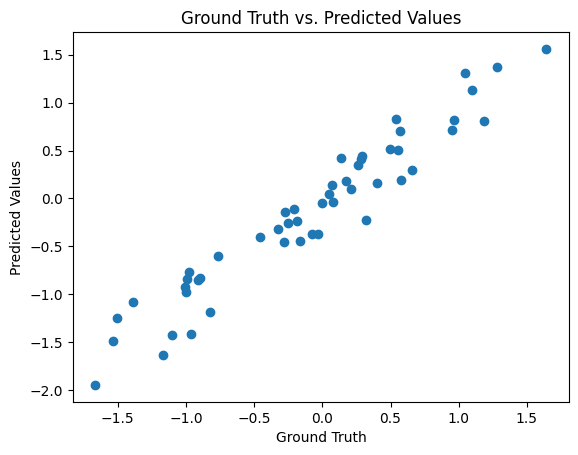

Regression score for OLS:  0.925054653410538


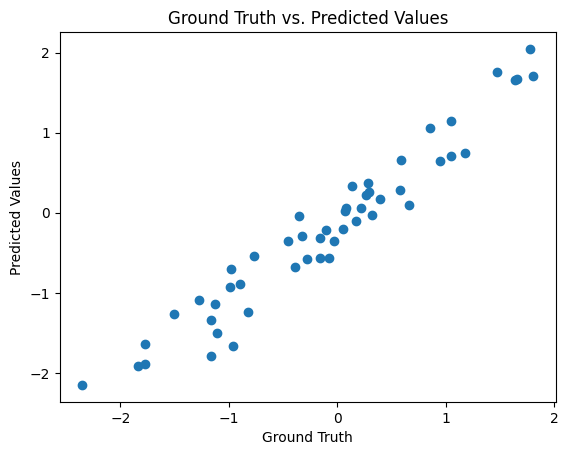

Regression score for OLS:  0.9309386016131744


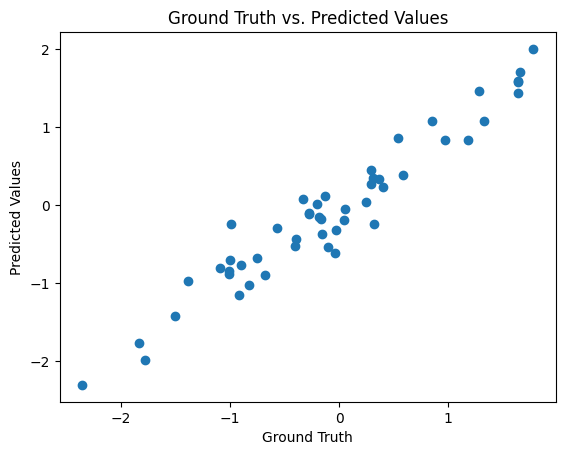

Regression score for OLS:  0.9359028625789907


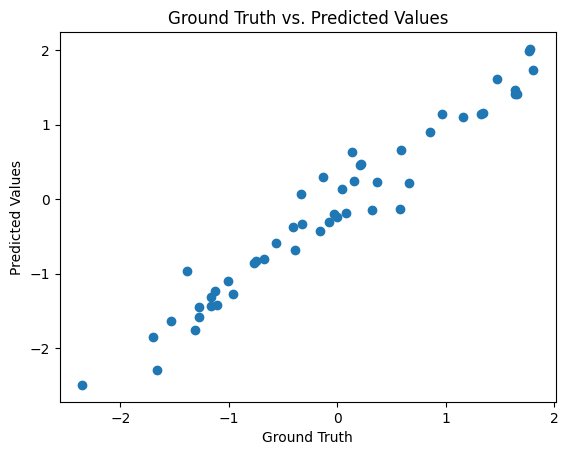

Regression score for OLS:  0.9249602868787987


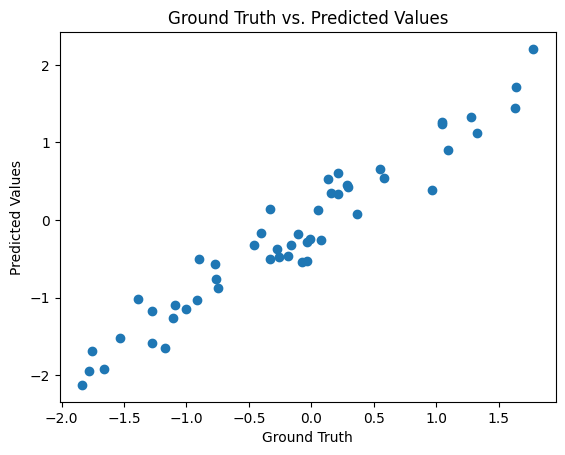

Regression score for OLS:  0.940270349641342


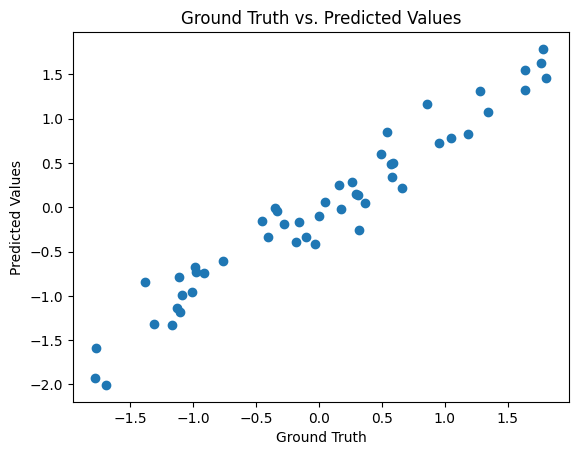

In [7]:
# I was told in class that we keep the split 50/50, but shuffle the data
#to create new training/test sets
# ill do this 5 times
from sklearn.model_selection import train_test_split

_models = []
_scores = []

for _ in range(10):
    #split the data into training and test sets 50/50
    train_xnew, test_xnew, train_ynew, test_ynew = train_test_split(data, y_concat, test_size=0.5, shuffle=True)
    lin_reg = LinearRegression().fit(train_xnew, train_ynew)

    # calculate score and print, append to list of models and scores
    print("Regression score for OLS: ", lin_reg.score(test_xnew, test_ynew))
    # print("Regression Model Coefficients/Weights",lin_reg.coef_)

    #make prediction
    pred_y = lin_reg.predict(test_xnew)

    # plot the predicted values vs the actual values
    plt.scatter(test_ynew, pred_y)
    plt.xlabel("Ground Truth")
    plt.ylabel("Predicted Values")
    plt.title("Ground Truth vs. Predicted Values")
    plt.show()
    
    _models.append(lin_reg)
    _scores.append(lin_reg.score(test_xnew, test_ynew))
    

In [8]:
#calculate average score
score_avg = np.mean(_scores)
#find model with minimum MSE
min_model = _models[np.argmax(_scores)]

print("Average R^2 score: ", score_avg)
print("Best R^2 score: ", np.max(_scores))

Average R^2 score:  0.935414762509313
Best R^2 score:  0.9597625363362323


Distribution of R^2 scores: 


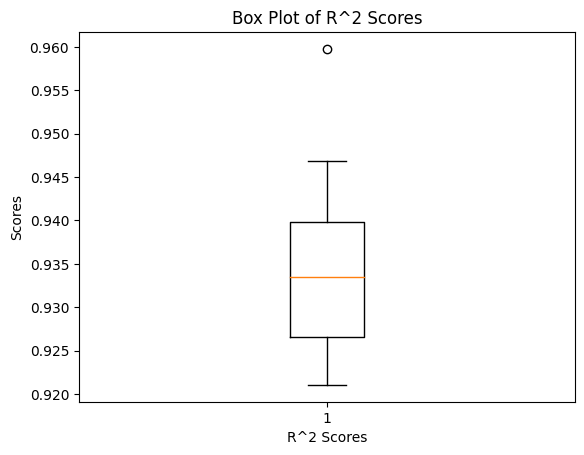

In [9]:
#box plot of the scores
print("Distribution of R^2 scores: ")
plt.boxplot(_scores)
plt.xlabel("R^2 Scores")
plt.ylabel("Scores")
plt.title("Box Plot of R^2 Scores")
plt.show()

In [10]:
_scores = pd.DataFrame(_scores)
_scores.columns = ['R^2 Scores']
#stats for boxplot

_scores.describe()

,R^2 Scores
count,10.000000
mean,0.935415
std,0.011640
min,0.921047
25%,0.926526
50%,0.933445
75%,0.939787
max,0.959763


### 5% extra credit: Generate your own data by converting the code in Appendix I to Python.

Then, experiment with different number of noisy channels (dd) and samples (n).  How does R2 change as a function of these two parameters?  Discuss this and other findings. 

In [11]:
def generate_data(n_val = 122, d_val = 7, dd_val = 11, filenum = "0"):
    # Generate predictors
    n = n_val    # number of examples
    d = d_val       # number of predictors
    dd = dd_val     # number of noisy channels
    
    x = np.random.randn(n, d)  # normally distributed predictors (IVs)
    x = np.column_stack([np.ones(n), x])  # add intercept
    w = np.random.randn(d + 1)  # forward model (from x to y)
    w = w / np.sqrt(np.sum(w**2))  # normalize regression coeffs (unit length)
    y = x.dot(w)  # generate dependent variable (DV)

    std = 0.25  # standard deviation of additive noise
    y = y + std * np.random.randn(n)  # add noise to DV

    noisy_channels = np.random.randn(n, dd)
    x = np.column_stack([x, noisy_channels])  # Add noisy channels

    ix = np.random.permutation(x.shape[1])  # shuffle predictors and noise channels
    x = x[:, ix]  # predictors are no longer in columns 1:d+1

    # Split data
    x1 = x[:n // 2, :]  # training data
    y1 = y[:n // 2]

    x2 = x[n // 2:, :]  # test data
    y2 = y[n // 2:]
        
    # Save data in CSV format
    x1_df = pd.DataFrame(x1)
    x2_df = pd.DataFrame(x2)
    y1_df = pd.DataFrame(y1)
    y2_df = pd.DataFrame(y2)

    
    x1_name = "generated_files/x1_" + filenum + ".csv"
    x2_name = "generated_files/x2_" + filenum + ".csv"
    y1_name = "generated_files/y1_" + filenum + ".csv"
    y2_name = "generated_files/y2_" + filenum + ".csv"
    
    if os.path.exists(x1_name):
        os.remove(x1_name)
    if os.path.exists(x2_name):
        os.remove(x2_name)
    if os.path.exists(y1_name):
        os.remove(y1_name)
    if os.path.exists(y2_name):
        os.remove(y2_name)
        
    x1_df.to_csv(x1_name, index=False, header=False)
    x2_df.to_csv(x2_name, index=False, header=False)
    y1_df.to_csv(y1_name, index=False, header=False)
    y2_df.to_csv(y2_name, index=False, header=False)

#### Now that we have the function, let's see how the R^2 changes based on the parameters dd and n
I predict that the R^2 value will increase as the number of samples increase, or as noise decreases.

In [12]:
#show R^2 scores for each generated dataset as we increase the parameter dd
# we go from dd = 5 to dd = 50 in increments of 5
dd_r2 = []
for i in range(1, 11):
    generate_data(dd_val = i*5, filenum = str(i))
    train_X = pd.read_csv('generated_files/x1_' + str(i) + '.csv', header=None)
    train_y = pd.read_csv('generated_files/y1_' + str(i) + '.csv', header=None)
    test_X = pd.read_csv('generated_files/x2_' + str(i) + '.csv', header=None)
    test_y = pd.read_csv('generated_files/y2_' + str(i) + '.csv', header=None)
    
    regression_model = linear_model.LinearRegression().fit(train_X, train_y)
    dd_r2.append(regression_model.score(test_X, test_y))

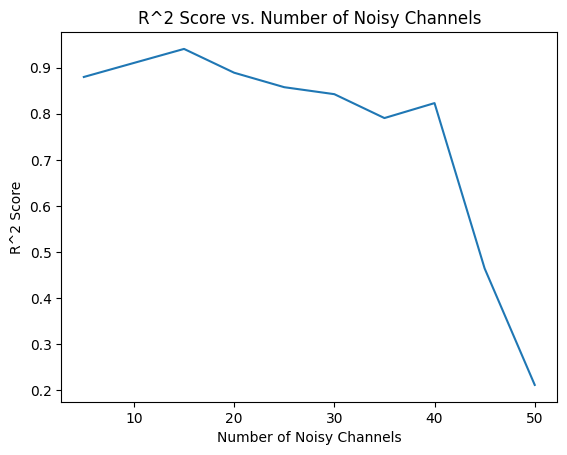

In [13]:
#plot the R^2 scores vs. the number of noisy channels
plt.plot(np.arange(5, 55, 5), dd_r2)
plt.xlabel("Number of Noisy Channels")
plt.ylabel("R^2 Score")
plt.title("R^2 Score vs. Number of Noisy Channels")
plt.show()


In [14]:
#now lets do the same thing, but with n samples increasing
#we will go from 100 to 1000 in increments of 100
n_r2 = []
for i in range(1, 11):
    generate_data(n_val = i*100, filenum = str(i))
    train_X = pd.read_csv('generated_files/x1_' + str(i) + '.csv', header=None)
    train_y = pd.read_csv('generated_files/y1_' + str(i) + '.csv', header=None)
    test_X = pd.read_csv('generated_files/x2_' + str(i) + '.csv', header=None)
    test_y = pd.read_csv('generated_files/y2_' + str(i) + '.csv', header=None)
    
    regression_model = linear_model.LinearRegression().fit(train_X, train_y)
    n_r2.append(regression_model.score(test_X, test_y))

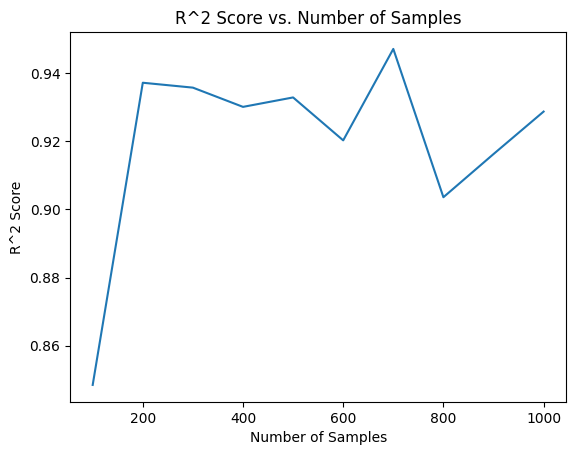

In [15]:
#plot the R^2 scores vs. the number of samples
plt.plot(np.arange(100, 1100, 100), n_r2)
plt.xlabel("Number of Samples")
plt.ylabel("R^2 Score")
plt.title("R^2 Score vs. Number of Samples")
plt.show()
